In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import geopandas as gpd

In [3]:
# gdf = pd.read_parquet("outputs/hotspots_per_fips_rolling_wc.parquet")
# gdf = gdf[["GEOID","heatday"]]
# gdf = gdf.groupby("GEOID").sum().reset_index()
# sp = gpd.read_file('data/WesternUSCensusTract/CensusTract2020_WesternUS.shp')
# gdf = sp.merge(gdf, left_on="FIPS", right_on="GEOID")

In [4]:
gdf = gpd.read_file("outputs/d2-events-2d-230929_SVI_shapefile.geojson")

In [5]:
# get boundary
boundary = gdf.dissolve().boundary.iloc[0]

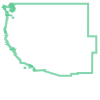

In [6]:
boundary

In [7]:
gdf = gdf[gdf["ST_ABBR"].isin(["CA","WA","OR"])]

In [8]:
# get census tracts on the boundary
#border_gdf = gdf[gdf.geometry.intersects(boundary)]

border_gdf = gdf[gdf.geometry.touches(boundary)]

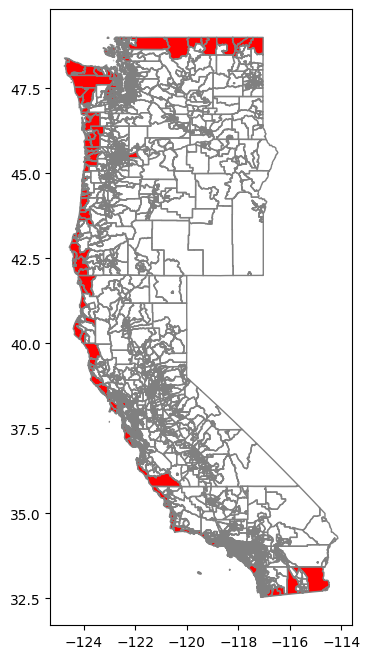

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf.boundary.plot(ax=ax, linewidth=1, color='gray')
border_gdf.geometry.plot(ax=ax, color='red')
plt.show()

## Remove north and south border

<Axes: >

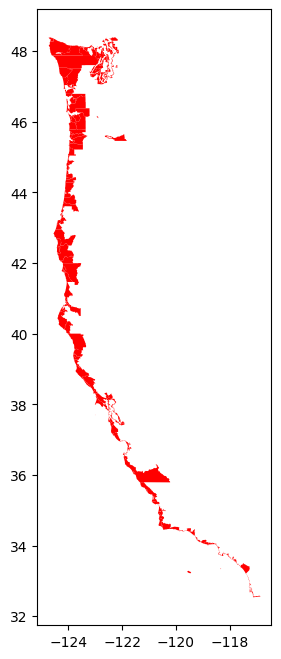

In [10]:
minx=-130
miny=32
maxx=-117
maxy=48.3
west_coast = border_gdf.cx[minx:maxx, miny:maxy]

fig, ax = plt.subplots(figsize=(12, 8))
#gdf.boundary.plot(ax=ax, linewidth=1, color='gray')
west_coast.geometry.plot(ax=ax, linewidth=1, color='red')
# plt.show()

In [11]:
# get neighbourhood
# result = []

# for _, ct in west_coast.iterrows():
#     matching_gdf = gdf[gdf.geometry.touches(ct.geometry)]
#     result.append(matching_gdf)

# # Concatenate the results into a single GeoDataFrame
# west_coast2 = pd.concat(result)

In [12]:
# fig, ax = plt.subplots(figsize=(12, 8))
# #gdf.boundary.plot(ax=ax, linewidth=1, color='gray')
# west_coast2.geometry.plot(ax=ax, linewidth=1, color='red')

In [13]:
# minx=-130
# miny=32.7157
# maxx=-117
# maxy=38.04 #48.3
# south_west_coast = border_gdf.cx[minx:maxx, miny:maxy]

# fig, ax = plt.subplots(figsize=(12, 8))
# #gdf.boundary.plot(ax=ax, linewidth=1, color='gray')
# south_west_coast.geometry.plot(ax=ax, linewidth=1, color='red')
# # plt.show()

In [14]:
coast_states = gdf[gdf["ST_ABBR"].isin(["CA","WA","OR"])]
non_coast = coast_states[~coast_states["FIPS"].isin(west_coast.FIPS)]

In [15]:
west_coast["coast"] = "coast"
non_coast["coast"] = "not coast"

frames = [west_coast, non_coast]
result = pd.concat(frames)

/Users/anatrisovic/Projects/coexposure/.venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/anatrisovic/Projects/coexposure/.venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


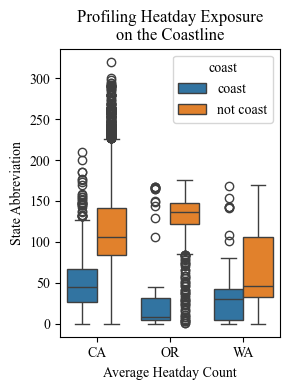

In [18]:
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(1, 1, figsize=(3, 4))

ax = sns.boxplot(data=result, y="heatday", x="ST_ABBR", hue="coast")
ax.set_ylabel("State Abbreviation")
ax.set_xlabel("Average Heatday Count")
ax.set_title("Profiling Heatday Exposure\non the Coastline")
#plt.show()
plt.tight_layout()
plt.savefig("figures/box_plot_coast.png")

In [ ]:
result.plot(column="coast", legend=True)

/home/ana_tris/.conda/envs/coexposure/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/ana_tris/.conda/envs/coexposure/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


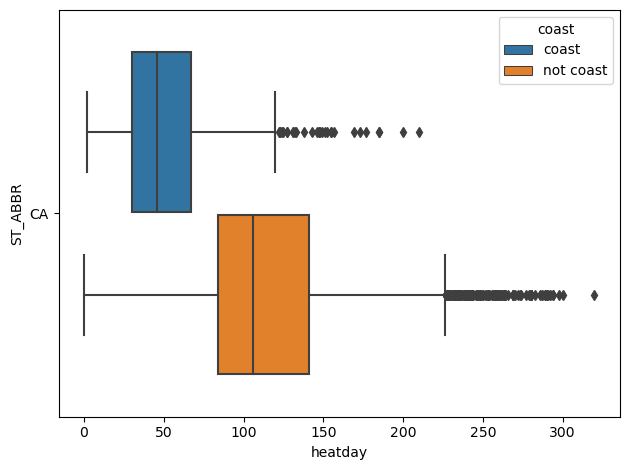

In [31]:
coast_states = gdf[gdf["ST_ABBR"].isin(["CA"])]
non_coast = coast_states[~coast_states["FIPS"].isin(south_west_coast.FIPS)]

south_west_coast["coast"] = "coast"
non_coast["coast"] = "not coast"

frames = [south_west_coast, non_coast]
result = pd.concat(frames)

sns.boxplot(data=result, x="heatday", y="ST_ABBR", hue="coast")

#plt.show()
plt.tight_layout()

/home/ana_tris/.conda/envs/coexposure/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


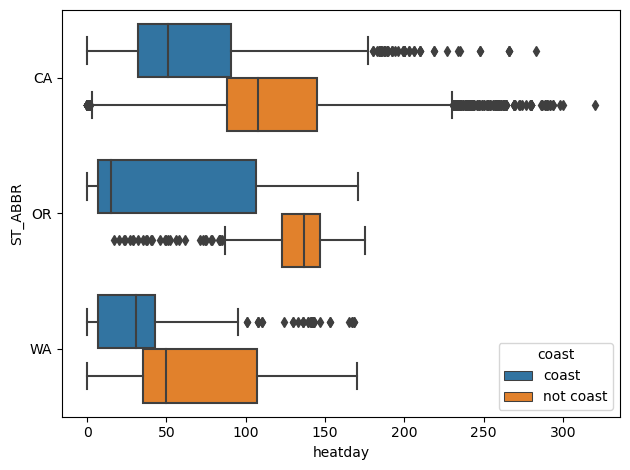

In [37]:
coast_states = gdf[gdf["ST_ABBR"].isin(["CA","WA","OR"])]
non_coast = coast_states[~coast_states["FIPS"].isin(west_coast2.FIPS)]

west_coast2["coast"] = "coast"
non_coast["coast"] = "not coast"

frames = [west_coast2, non_coast]
result = pd.concat(frames)

sns.boxplot(data=result, x="heatday", y="ST_ABBR", hue="coast")

#plt.show()
plt.tight_layout()

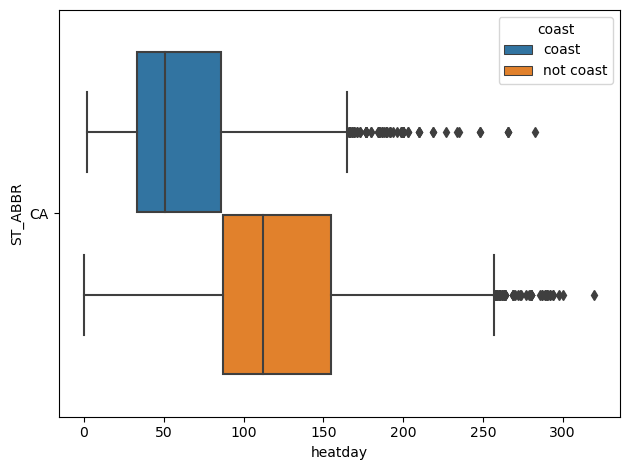

In [38]:
minx=-130
miny=32.7157
maxx=-117
maxy=38.04 #48.3

result = result.cx[minx:maxx, miny:maxy]

sns.boxplot(data=result, x="heatday", y="ST_ABBR", hue="coast")

#plt.show()
plt.tight_layout()

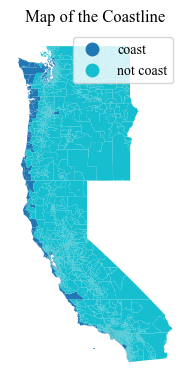

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(2, 4))

result.plot(column="coast", legend=True, ax=ax)
#ax.set_ylabel("State Abbreviation")
#ax.set_xlabel("Average Heatday Count")
ax.set_title("Map of the Coastline")
#plt.show()
ax.set_axis_off()
plt.tight_layout()
plt.savefig("figures/box_map_plot_coast.png")

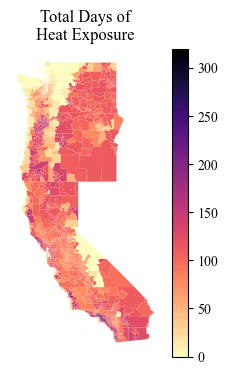

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(3, 4))

result.plot(column="heatday", legend=True, ax=ax, cmap="magma_r")
#ax.set_ylabel("State Abbreviation")
#ax.set_xlabel("Average Heatday Count")
ax.set_title("Total Days of\nHeat Exposure")
#plt.show()
ax.set_axis_off()
#plt.tight_layout()
plt.savefig("figures/box_heatday_plot_coast.png")

In [45]:
result["POP_SQMI"] = result["E_TOTPOP"]/result["AREA_SQMI"]

<Axes: >

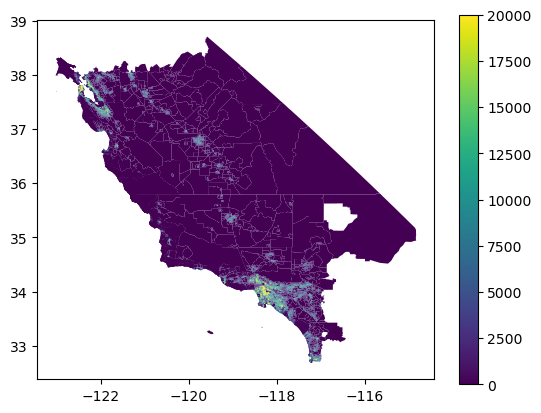

In [60]:
import matplotlib.colors as mcolors
result.plot(column="POP_SQMI", legend=True, norm = mcolors.Normalize(vmin=data['wfday'].min(), vmax=20000))

In [75]:
result["urban"] = result["POP_SQMI"]>=15000

<Axes: xlabel='heatday', ylabel='ST_ABBR'>

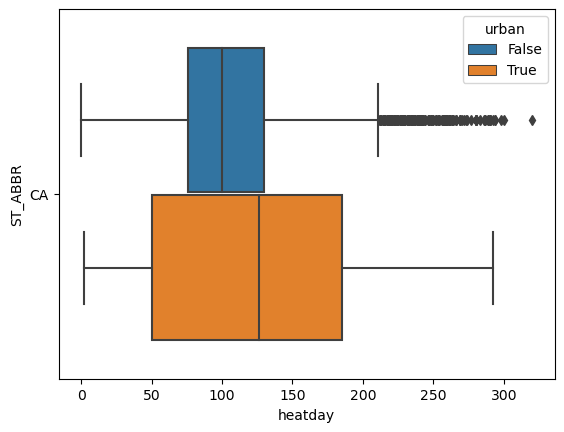

In [76]:
sns.boxplot(data=result, x="heatday", y="ST_ABBR", hue="urban")

<Axes: xlabel='heatday', ylabel='ST_ABBR'>

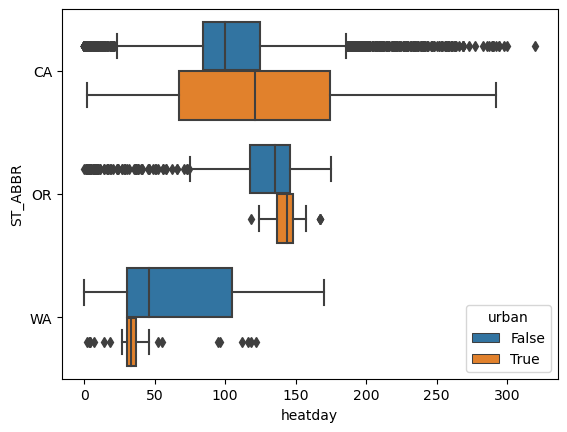

In [85]:
result["POP_SQMI"] = result["E_TOTPOP"]/result["AREA_SQMI"]
result["urban"] = result["POP_SQMI"]>=10000
sns.boxplot(data=result, x="heatday", y="ST_ABBR", hue="urban")

In [86]:
# west_coast["heatday"] = west_coast["heatday"]/total_years
# west_coast.groupby(['ST_ABBR'], as_index=False).agg({'heatday':['mean','std']})

In [104]:
df = pd.read_parquet("outputs/hotspots_per_fips_rolling_wc.parquet")
ca_2015 = df[(df.index.year == 2019) | (df.index.year == 2020)]